# Customer Churn Prediction at SyriaTel








## 1. Business Understanding

### Stakeholder Audience
The primary stakeholders for this project are customer retention and marketing teams at a telecommunications company, as well as customer service managers and senior leadership.

### Business Problem
Customer churn leads to lost revenue and increased costs associated with acquiring new customers. By identifying customers who are likely to churn before they leave, the business can prioritize outreach, improve customer service experiences, and design targeted retention offers.



## 2. Data Understanding

### Why This Dataset Is Appropriate
The dataset includes customer demographics, service plans, call usage behavior, and customer service interaction data. These variables are directly relevant to churn behavior, making the dataset well-suited for a supervised classification task focused on churn prediction.

### import packages, read_csv and create dataframe

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score



In [60]:
# Loading the Dataset

df = pd.read_csv('../Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [61]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [62]:
df.shape

(3333, 21)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [64]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [65]:
df['churn'].value_counts()
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

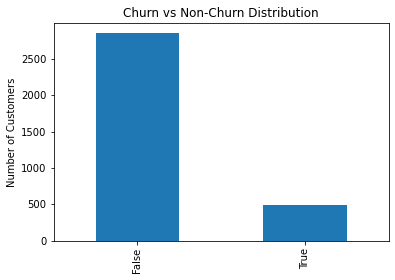

In [66]:
# Visualize the distribution of churn vs non-churn customers to assess class imbalance

df["churn"].value_counts().plot(kind="bar")
plt.title("Churn vs Non-Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()

## 3. Data Preparation

In [67]:
# Drop identifier column that does not carry predictive information
df = df.drop(columns=["phone number"])
df.columns


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [68]:
# Separate features and target variable
X = df.drop(columns=["churn"])
y = df["churn"]


In [69]:
X.shape, y.shape

((3333, 19), (3333,))

In [70]:
#Splitting data into Training and Test sets using stratify to ensure the same class distribution in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 


In [71]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


False    0.854573
True     0.145427
Name: churn, dtype: float64

In [72]:
# identifying feature types
categorical_features = X_train.select_dtypes(include=["object"]).columns
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

categorical_features, numeric_features


(Index(['state', 'international plan', 'voice mail plan'], dtype='object'),
 Index(['account length', 'area code', 'number vmail messages',
        'total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge',
        'customer service calls'],
       dtype='object'))

In [73]:
# encoding categorical data

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])


In [74]:
# scaling numerical features
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])


In [75]:
# Combining processed numerical and categorical features
X_train_prepared = np.hstack([X_train_num, X_train_categorical])
X_test_prepared = np.hstack([X_test_num, X_test_categorical])

X_train_prepared.shape, X_test_prepared.shape


((2666, 71), (667, 71))

## 4. Modeling

### Model 1 - Logistic Regression

A logistic regression model was trained to predict customer churn. Logistic regression was chosen for its interpretability and suitability for binary classification. Class imbalance was addressed using class-weighted training. Model performance was evaluated on a held-out test set, with recall and ROC-AUC used to assess the model’s ability to identify at-risk customers.


In [76]:
# Initialize baseline logistic regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

# Fit the model on the training data to prevent data leakage
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [77]:
# Predictions on training and test sets
y_train_pred = log_reg.predict(X_train_prepared)
y_test_pred = log_reg.predict(X_test_prepared)

# Predicted probabilities for ROC-AUC
y_test_proba = log_reg.predict_proba(X_test_prepared)[:, 1]


In [ ]:
# Evaluate performance on the training set to detect potential overfitting.
print("Training Classification Report")
print(classification_report(y_train, y_train_pred))

# Evaluate performance on unseen test data to assess generalization.
print("Test Classification Report")
print(classification_report(y_test, y_test_pred))

print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))



Training Classification Report
              precision    recall  f1-score   support

       False       0.96      0.78      0.86      2280
        True       0.37      0.78      0.51       386

    accuracy                           0.78      2666
   macro avg       0.66      0.78      0.68      2666
weighted avg       0.87      0.78      0.81      2666

Test Classification Report
              precision    recall  f1-score   support

       False       0.94      0.76      0.84       570
        True       0.33      0.71      0.45        97

    accuracy                           0.75       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.75      0.78       667

Test ROC-AUC: 0.8036896364622897


### Overfitting

Compared training and test performance to assess overfitting.
A small performance gap indicates good generalization.

Train accuracy: 0.78

Test accuracy: 0.75

ROC-AUC: 0.80

Small gap showing no severe overfitting observed.

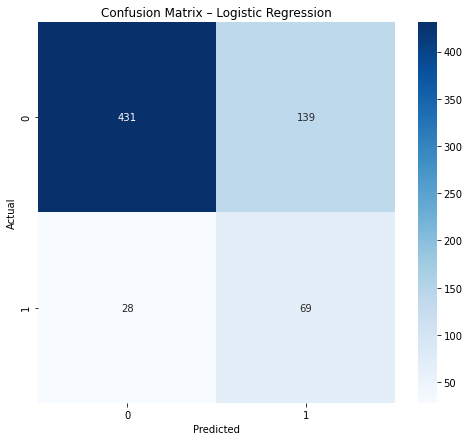

In [83]:
# The confusion matrix shows true positives, false positives, true negatives, and false negatives.

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


The model correctly identifies a substantial portion of churners (69) while keeping false negatives relatively low (28).

However, there are 139 false positives, meaning some non-churn customers may receive unnecessary retention interventions.

Because recall for churn is relatively high compared to false negatives, the model is reasonably effective at detecting at-risk customers, which is often more important than precision in churn prediction contexts.

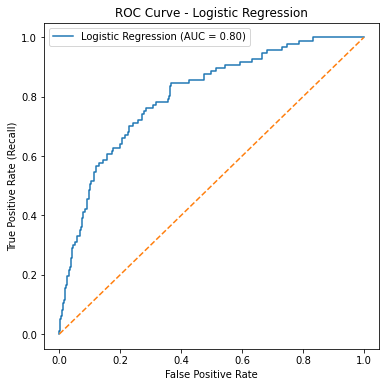

In [80]:
# Get predicted probabilities
y_test_proba = log_reg.predict_proba(X_test_prepared)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [81]:
# Reconstruct feature names
feature_names = np.concatenate([
    numeric_features,
    encoder.get_feature_names(categorical_features)
])

# Create coefficient dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": log_reg.coef_[0]
}).sort_values(by="coefficient", ascending=False)

# View strongest effects
coef_df.head(10), coef_df.tail(10)


(                   feature  coefficient
 20                state_CA     1.279303
 68  international plan_yes     1.228295
 42                state_MT     1.160090
 69      voice mail plan_no     1.082801
 56                state_SC     0.902145
 15  customer service calls     0.839044
 47                state_NJ     0.687579
 2    number vmail messages     0.600217
 41                state_MS     0.573363
 59                state_TX     0.566879,
                   feature  coefficient
 30               state_IL    -0.583494
 17               state_AL    -0.706033
 66               state_WY    -0.710064
 45               state_NE    -0.731407
 58               state_TN    -0.762231
 62               state_VT    -0.969895
 70    voice mail plan_yes    -1.088515
 61               state_VA    -1.121779
 67  international plan_no    -1.234008
 27               state_HI    -1.426636)

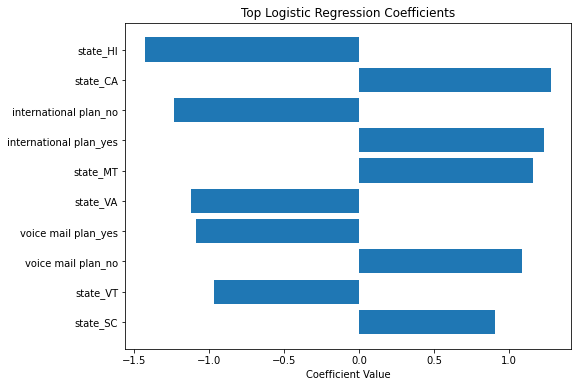

In [82]:
# Get top 10 strongest features by absolute value
top_features = coef_df.reindex(
    coef_df["coefficient"].abs().sort_values(ascending=False).index
).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_features["feature"], top_features["coefficient"])
plt.title("Top Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()


Features with larger absolute coefficients have stronger influence on churn prediction.

### Cross-validation evaluates model stability across multiple data splits.

In [85]:


cv_scores = cross_val_score(
    log_reg,
    X_train_prepared,
    y_train,
    cv=5,
    scoring="roc_auc"
)

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())


Cross-Validation ROC-AUC Scores: [0.74671053 0.82911825 0.84720324 0.82202666 0.79206539]
Mean CV ROC-AUC: 0.8074248120300753


The 5-fold cross-validation ROC-AUC scores ranged between 0.75 and 0.85, with a mean of approximately 0.81.

The relatively small variation across folds indicates that the logistic regression model is stable and generalizes consistently across different subsets of the data.

Since the cross-validation mean closely matches the test ROC-AUC, there is no evidence of severe overfitting.

## 5. Evaluation

## 6. Conclusion